# Z-점수 기반 이상치 탐지 실습

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

### 시계열 데이터 생성, 이상치 추가, 데이터 프레임 생성

In [2]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 따르는 데이터 생성 

# 이상치 추가 
values[20] = 50 # 이상치 추가
values[40] = 60

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

print(data)

         Date      Value
0  2023-01-01   4.967142
1  2023-01-02  -1.382643
2  2023-01-03   6.476885
3  2023-01-04  15.230299
4  2023-01-05  -2.341534
..        ...        ...
95 2023-04-06 -14.635149
96 2023-04-07   2.961203
97 2023-04-08   2.610553
98 2023-04-09   0.051135
99 2023-04-10  -2.345871

[100 rows x 2 columns]


### 이상치 탐지 

In [5]:
# z_scores 계산 
z_scores = np.abs(stats.zscore(data['Value']))

# 임계값 설정 
threshold = 3 

# z_scores 가 임계값을 초과하는지 확인 
outliers = z_scores > threshold

### 시각화 및 이상치 값 확인 

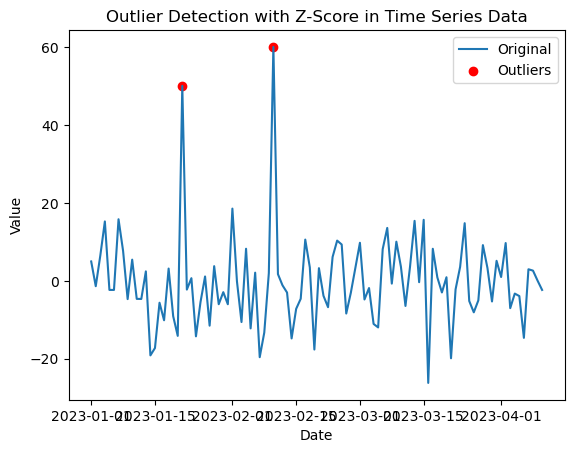

Detected Outliers:
20    50.0
40    60.0
Name: Value, dtype: float64


In [6]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.legend()
plt.show()

# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)